In [1]:
# 必要なパッケージを呼び出す
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# MATLABではグローバル変数を使って関数への変数受け渡しを行う
# Julia/Pythonではコンストラクタを用いる

# ギリシャ文字の使用は不可とする
class Model:

    def __init__(self,alpha,beta,delta,Abar,kss,css,T):

        # カリブレーション
        self.alpha = alpha 
        self.beta = beta           
        self.delta = delta 
        self.Abar = Abar

        # 定常状態の値
        self.kss = kss
        self.css = css    
    
        # 移行過程に関する変数
        self.T = T

In [3]:
# カリブレーション
alpha = 0.4
beta = 0.96
delta = 1.0 
Abar = 1.0

# 定常状態の値
kss = (alpha*beta*Abar/(1-beta*(1-delta)))**(1/(1-alpha))
css = Abar*kss**alpha - delta*kss

# 移行過程に関する変数
T = 100

# k の初期値
k0 = 0.1*kss 

##### 後ろ向き帰納法によって移行経路を解く(transition2.m に対応)

In [4]:
m = Model(alpha,beta,delta,Abar,kss,css,T)

# imaginary states
kvec0 = np.linspace(k0,m.kss,m.T)
kvec1 = np.copy(kvec0)
yvec = np.zeros(m.T)
rvec = np.zeros(m.T)
wvec = np.zeros(m.T)
cvec = np.zeros(m.T)
kvec = np.zeros(m.T)

lamk = 0.9
diff = 1e+4
crit = 1e-4
iter = 0

while diff > crit:

    yvec = m.Abar * (kvec0 ** m.alpha)
    rvec = m.alpha * yvec/kvec0
    wvec = (1-m.alpha) * yvec

    cvec[m.T-1] = css
    for i in reversed(range(m.T-1)): # t=T-1,...,1,0
        cvec[i] = cvec[i+1]/(beta*(1+rvec[i+1]-delta))
    
    kvec[0] = k0
    for j in range(m.T-1):
        kvec[j+1] = yvec[j] - cvec[j] + (1-m.delta)*kvec[j] # k1,k2,...,kT
    
    # update
    kvec1 = lamk*kvec0 + (1-lamk)*kvec

    diff = np.max(np.abs(kvec1-kvec0))
    kvec0 = np.copy(kvec1)
    iter += 1

    # use the terminal condition as the criterion
    print([iter, diff])



[1, 0.030751717589878352]
[2, 0.030881088034550308]
[3, 0.030696004174300878]
[4, 0.03043485631161033]
[5, 0.0304372208476984]
[6, 0.02328467940886844]
[7, 0.027439423555226355]
[8, 0.027487768525698703]
[9, 0.02430725855220367]
[10, 0.017743616137073773]
[11, 0.09065670158000429]
[12, 0.050097795668267775]
[13, 0.02908741278074936]
[14, 0.028060162606916156]
[15, 0.02647738712798567]
[16, 0.020896922417345087]
[17, 0.016143808924757447]
[18, 0.051165593171115215]
[19, 0.04096598566109444]
[20, 0.028387036800990112]
[21, 0.02092219614744692]
[22, 0.022678422251538044]
[23, 0.021157188553934003]
[24, 0.017785889279608474]
[25, 0.01457071198868104]
[26, 0.023533849904151055]
[27, 0.03135004046605394]
[28, 0.02627017907543991]
[29, 0.02010766086276561]
[30, 0.015631523205423742]
[31, 0.016205012815764724]
[32, 0.016596554095542393]
[33, 0.015006759258536062]
[34, 0.012674892496213008]
[35, 0.01065290026549287]
[36, 0.013075786830061414]
[37, 0.01748775358090568]
[38, 0.01682427090664304]


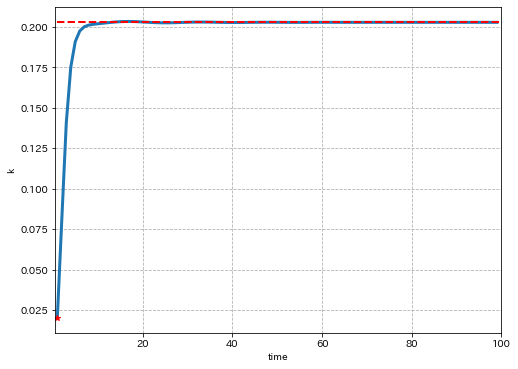

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,m.T),kvec[0:m.T-1],lw=3)
ax.plot([1.0],[kvec[0]],c="r",marker="*")
ax.plot([1,100],[m.kss,m.kss],c="red",ls="--",lw=2)
ax.set(xlabel="time",ylabel="k",xlim=(0.5,m.T))
ax.grid(ls="--")
plt.show()

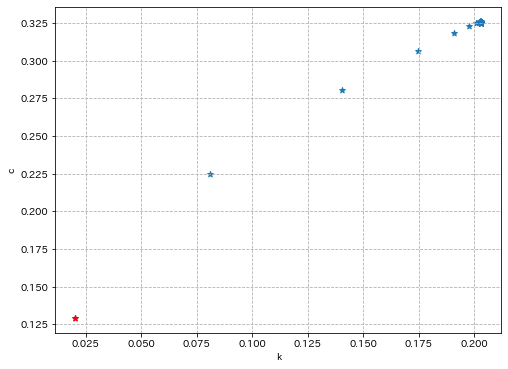

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(kvec0,cvec,marker="*")
ax.scatter(kvec[0],cvec[0],marker="*",c="r")
ax.set(xlabel="k",ylabel="c")
ax.grid(ls="--")
plt.show()